In [1]:
import numpy as np
import seaborn as sns

In [2]:
init_state = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
])

In [3]:
class Game:
    def __init__(self, state):
        self.state = state
        self.empty = self.make_empty(state)
        
    def make_empty(self, state):
        emp = []
        for i in range(3):
            for j in range(3):
                if state[i][j] == 0:
                    emp.append(3*i + j)
        
        return emp
    
    def is_lose(self, a):
        opp = 2 - (a-1)
        
        for i in range(3):
            if self.state[i][0] == self.state[i][1] == self.state[i][2] == opp:
                return 1
            elif self.state[0][i] == self.state[1][i] == self.state[2][i] == opp:
                return 1
        if self.state[0][0] == self.state[1][1] == self.state[2][2] == opp:
            return 1
        return 0
    
    def is_win(self, a):       
        for i in range(3):
            if self.state[i][0] == self.state[i][1] == self.state[i][2] == a:
                return 1
            elif self.state[0][i] == self.state[1][i] == self.state[2][i] == a:
                return 1
        if self.state[0][0] == self.state[1][1] == self.state[2][2] == a:
            return 1
        if self.state[0][2] == self.state[1][1] == self.state[2][0] == a:
            return 1
        return 0
    
    def is_draw(self, a):
        if self.is_win(a):
            return 0
        if np.all(self.state):
            return 1
        else:
            return 0
        
    def is_done(self):
        if self.is_win(1) or self.is_win(2) or self.is_draw(a):
            return 1
        else:
            return 0
        
        
    def update(self, target, a):
        state = self.state.copy()
        x, y = target//3, target%3
        state[x][y] = a
        return Game(state)

In [4]:
sample = np.array([
    [1, 1, 2], 
    [1, 2, 2],
    [2, 1, 1]
])
qq = Game(sample)
qq.is_draw(2)

0

In [5]:
g = Game(init_state)

In [6]:
g.state

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [7]:
# def mcs(game):
#     n = 10
#     values = [0] * len(game.empty)
    
#     for i, a in enumerate(game.empty):
#         for _ in range(n):
#             values[i] += -playout(game.update())
    

In [8]:
class Random:
    def __init__(self, status):
        self.status = status
        
        
    def action(self, game):
        return np.random.choice(game.empty)

In [9]:
class MCS:
    def __init__(self, status, n):
        self.status = status
        self.n = n
        
    
    def playout(self, game):
        if game.is_lose(self.status):
            return -1
        
        if game.is_draw(self.status):
            return 0
        
        
        if game.is_win(self.status):
            return 1
        
        return self.playout(game.update(np.random.choice(game.empty), self.status))
    
    
    def action(self, game):
        values = [0] * len(game.empty)

        for i, a in enumerate(game.empty):
            for _ in range(self.n):
                g = game.update(a, self.status)
                values[i] += -self.playout(g)
                
        return game.empty[np.argmax(values)]

In [10]:
def play(game, m1, m2):
    global score
    while 1:
        a1 = m1.action(game)
        game = game.update(a1, m1.status)
        if game.is_win(m1.status):
#             print(m1.status, 'wins')
#             print(game.state)
            score[m1.status-1] += 1
            return 
        elif game.is_draw(m1.status):
#             print('draw')
#             print(game.state)
            score[2] += 1
            return 

        a2 = m2.action(game)
        game = game.update(a2, m2.status)
        if game.is_win(m2.status):
#             print(m2.status, 'wins')
#             print(game.state)
            score[m2.status-1] += 1
            return 
        elif game.is_draw(m2.status):
#             print('draw')
#             print(game.state)
            score[2] += 1
            return 

#         print(game.state)
# #         return Game(game.state)

In [11]:
game = Game(init_state)
m1 = Random(1)
m2 = MCS(2, 20)

In [12]:
score = [0, 0, 0]
for _ in range(1000):
    play(game, m1, m2)
    
for _ in range(1000):
    play(game, m2, m1)

In [13]:
score

[710, 1208, 82]

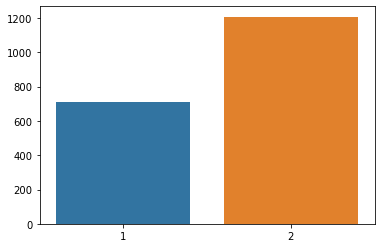

In [14]:
sns.barplot(x = [1, 2], y = score[:2])

In [15]:
game.state

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])